In [244]:
import os
import json
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [245]:
import json

tweets_file = open('geotagged_tweets_20160812-0912.1000.jsons', "r")

def flatten_tweets(tweets_json):
    """ Flattens out tweet dictionaries so relevant JSON
        is in a top-level dictionary."""
    tweets_list = []

# This still needs some work!!
# Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj[extended_tweet-full_text] = tweet_obj['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
            
        tweets_list.append(tweet_obj)
    return tweets_list

tweets = flatten_tweets(tweets_file)


In [246]:
import pandas as pd

from pandas.io.json import json_normalize
# Thank gawd for this package - all json fields straight into columns in a dataframe, no bullshit
tweets_df = json_normalize(tweets)

tweets_df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.country,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates,quoted_status.scopes.followers
0,Sun Sep 11 02:05:23 +0000 2016,774790914589990912,774790914589990912,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,1.339836e+09,1339835893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Aug 17 20:18:54 +0000 2016,766006411994292224,766006411994292224,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Sep 02 23:06:23 +0000 2016,771846762533224448,771846762533224448,Attorney's first line of defense to those they...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Sep 01 03:01:51 +0000 2016,771181247179558912,771181247179558912,@kikesma @norma22flores @EPN @realDonaldTrump ...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,7.710818e+17,771081824512643073,8.541293e+07,85412926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Sep 10 05:22:45 +0000 2016,774478196502700032,774478196502700032,Classy.. Better than I expected. But on a se...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
cols = []

for col in tweets_df.columns:
    if col in ('created_at', 'place/country', 'place.country','place.country_code','place.name','is_quote_status','lang','text','user.created_at','user.description','user.name','user.location','place.place_type', 'user-screen_name', 'in_reply_to_screen_name','geo.type','geo.coordinates', 'retweeted_status-text'):
        cols.append(col)

neat_df = tweets_df[cols]
neat_df.head()

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user-screen_name,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates
0,Sun Sep 11 02:05:23 +0000 2016,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,HillaryClinton,False,en,AlbertNewton22,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN
1,Wed Aug 17 20:18:54 +0000 2016,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,None,False,en,JimmyBear2,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN
2,Fri Sep 02 23:06:23 +0000 2016,Attorney's first line of defense to those they...,None,False,en,GLCPOPS,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN
3,Thu Sep 01 03:01:51 +0000 2016,@kikesma @norma22flores @EPN @realDonaldTrump ...,kikesma,False,es,upatrocinio,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN
4,Sat Sep 10 05:22:45 +0000 2016,Classy.. Better than I expected. But on a se...,None,True,en,wfm01945,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN


In [248]:
def label_language(df) :
    if df["lang"] == "en" :
        return "English"
    elif df["lang"] == "es" :
        return "Spanish"
    elif df["lang"] == "ger":
        return "German"
    elif df["lang"] == "nl" :
        return "Dutch"
    elif df["lang"] == "it" :
        return "Italian"
    elif df["lang"] == "fr":
        return "French"
    else :
        return "Other"
neat_df["lang"] = neat_df.apply(lambda neat_df:label_language(neat_df),axis = 1)

In [285]:
neat_df.head(n = 10)

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user-screen_name,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates
0,Sun Sep 11 02:05:23 +0000 2016,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,HillaryClinton,False,English,AlbertNewton22,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN
1,Wed Aug 17 20:18:54 +0000 2016,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,None,False,English,JimmyBear2,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN
2,Fri Sep 02 23:06:23 +0000 2016,Attorney's first line of defense to those they...,None,False,English,GLCPOPS,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN
3,Thu Sep 01 03:01:51 +0000 2016,@kikesma @norma22flores @EPN @realDonaldTrump ...,kikesma,False,Spanish,upatrocinio,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN
4,Sat Sep 10 05:22:45 +0000 2016,Classy.. Better than I expected. But on a se...,None,True,English,wfm01945,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN
5,Sat Aug 27 04:28:17 +0000 2016,@realDonaldTrump I wouldn't even consider it w...,realDonaldTrump,False,English,educatorob,Rob Desmond,"Santa Clarita Valley, CA",That the poweful play goes on and you may cont...,Tue Jan 03 02:43:33 +0000 2012,city,Stevenson Ranch,US,United States,NaN,NaN
6,Thu Aug 25 15:42:29 +0000 2016,Join me again @CNN @ThisHour 11:45am re #Trump...,None,False,English,MariaTCardona,Maria Cardona,Washington DC,"Political Strategist, CNN/CNNEE Contributor, P...",Fri Mar 19 15:26:01 +0000 2010,city,Washington,US,United States,NaN,NaN
7,Wed Aug 17 19:36:22 +0000 2016,More fraud from soros and Clinton https://t.co...,None,True,English,zarember_cindy,Cindy zarember,"Los Alamitos, CA",Business Owner BIG Trump supporter member of ...,Wed Mar 12 00:24:06 +0000 2014,city,Los Alamitos,US,United States,NaN,NaN
8,Sun Aug 21 19:59:25 +0000 2016,Right! @realDonaldTrump thinks he's special‼️ ...,None,True,English,Debi129,DEBI129,None,CLINTON❤️KAINE ❤️BLM❤️EQUALITY❤️PP❤️ NO ABUSER...,Thu Sep 25 01:28:59 +0000 2008,admin,Washington,US,United States,NaN,NaN
9,Tue Aug 23 05:20:59 +0000 2016,@JohnKStahlUSA I want @realDonaldTrump to say ...,JohnKStahlUSA,False,English,NRSDAWG,SWalker for Trump,USA,Tired of @GOP not delivering on promises or le...,Mon Nov 03 17:55:38 +0000 2008,city,Houston,US,United States,NaN,NaN


In [250]:
neat_df["lang"]

0      English
1      English
2      English
3      Spanish
4      English
        ...   
995    Spanish
996      Other
997    English
998    English
999    English
Name: lang, Length: 1000, dtype: object

In [226]:
reply_trump= (neat_df[(neat_df["in_reply_to_screen_name"] == "realDonaldTrump")].reset_index()
                  .drop(columns = ["index"],axis = 1))
reply_hillary= (neat_df[(neat_df["in_reply_to_screen_name"] == "HillaryClinton")].reset_index()
                  .drop(columns = ["index"],axis = 1))
reply_total= (neat_df[(neat_df["in_reply_to_screen_name"] == "")].reset_index()
                  .drop(columns = ["index"],axis = 1))

In [227]:
amount_replies_trump = len(reply_trump.index)
amount_replies_hillary = len(reply_hillary.index)
rest = len(neat_df.index) - amount_replies_trump - amount_replies_hillary



percentage_reply_hillary = amount_replies_hillary / total
percentage_reply_trump = amount_replies_trump / total
percentage_rest = (total - amount_replies_trump - amount_replies_hillary) / total


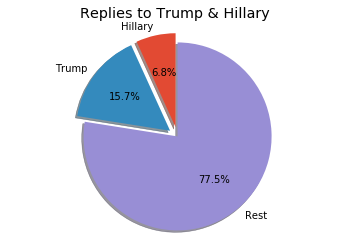

In [305]:
labels = 'Hillary', 'Trump', 'Rest'
sizes = [amount_replies_hillary, amount_replies_trump ,rest]
explode = (0.1, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Replies to Trump & Hillary")

plt.show()

In [268]:
english_tweets = (neat_df[(neat_df["lang"] == "English")].reset_index()
                  .drop(columns = ["index"],axis = 1))
spanish_tweets = (neat_df[(neat_df["lang"] == "Spanish")].reset_index()
                  .drop(columns = ["index"],axis = 1))
german_tweets = (neat_df[(neat_df["lang"] == "German")].reset_index()
                  .drop(columns = ["index"],axis = 1))
dutch_tweets = (neat_df[(neat_df["lang"] == "Dutch")].reset_index()
                  .drop(columns = ["index"],axis = 1))
italian_tweets = (neat_df[(neat_df["lang"] == "Italian")].reset_index()
                  .drop(columns = ["index"],axis = 1))
french_tweets = (neat_df[(neat_df["lang"] == "French")].reset_index()
                  .drop(columns = ["index"],axis = 1))
other_language = (neat_df[(neat_df["lang"] == "Other")].reset_index()
                  .drop(columns = ["index"],axis = 1))


In [269]:
amount_english_tweets = len(english_tweets.index)
amount_spanish_tweets = len(spanish_tweets.index)
amount_french_tweets = len(french_tweets.index)
amount_other_language = len(neat_df.index) - amount_spanish_tweets - amount_english_tweets - amount_french_tweets

amount_spanish_tweets

22

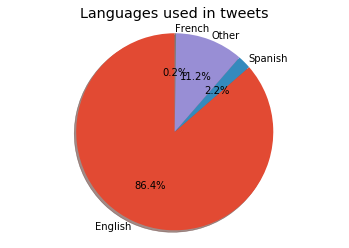

In [284]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'English', 'Spanish', 'Other', 'French'
sizes = [amount_english_tweets, amount_spanish_tweets, amount_other_language, amount_french_tweets]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = cmap(np.linspace(0., 1., len(slices)))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
        shadow=True, startangle=90)

for part in slice_collection[0]:
    part.set_edgecolor('white')


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Languages used in tweets")
plt.show()

In [286]:
neat_df['place.country']

0      United States
1      United States
2      United States
3             México
4      United States
           ...      
995    United States
996    United States
997    United States
998    United States
999    United States
Name: place.country, Length: 1000, dtype: object

In [307]:
american_acc = (neat_df[(neat_df["place.country"] == "United States")].reset_index()
                  .drop(columns = ["index"],axis = 1))
mexican_acc = (neat_df[(neat_df["place.country"] == "México")].reset_index()
                  .drop(columns = ["index"],axis = 1))
canadian_acc = (neat_df[(neat_df["place.country"] == "Canada")].reset_index()
                  .drop(columns = ["index"],axis = 1))

canadian_acc

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user-screen_name,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates
0,Wed Sep 07 12:19:58 +0000 2016,Of course @CNN like @FoxNews are conservative ...,None,True,en,ChukwuemekaObia,Chukwuemeka Obiajunw,"Edmonton, Alberta, Canada",Executive Director of Africa We Care - Dedicat...,Fri Feb 18 20:38:53 +0000 2011,city,Edmonton,CA,Canada,NaN,NaN
1,Wed Aug 31 22:48:10 +0000 2016,@UN @POTUS @CIA @USArmy @JohnKerry @khamenei_i...,DustiHeyZeus,False,en,DustiHeyZeus,WeAre朋友Already,Canada,#CaliphKufr #KingOfTheNorth Works@#Earth rides...,Mon Oct 17 21:14:00 +0000 2011,city,Ottawa,CA,Canada,NaN,NaN
2,Sun Sep 11 13:27:29 +0000 2016,La vérité n'est pas une insulte https://t.co/h...,None,True,fr,dandemannecafe,Daniel Des Roches,"Gatineau, Québec",En français Politics Culture,Fri Dec 25 18:49:48 +0000 2015,city,Gatineau,CA,Canada,NaN,NaN
3,Wed Aug 17 03:31:18 +0000 2016,@bsquaredBobB @Rockprincess818 Get out and get...,bsquaredBobB,False,en,purdycan,Carole,None,None,Tue Oct 21 19:33:40 +0000 2014,city,Edmonton,CA,Canada,NaN,NaN
4,Sun Aug 28 14:56:10 +0000 2016,Diversity! https://t.co/kdWYCv4tga,None,True,en,RAdamStewart,"Adam Stewart, CFRE","Toronto, ON",Fundraiser for @TheHSF and volunteer for @Insi...,Wed Mar 30 00:35:15 +0000 2011,city,Toronto,CA,Canada,NaN,NaN
5,Mon Aug 15 19:11:51 +0000 2016,@realDonaldTrump Stop using #SanBernardino #Bo...,realDonaldTrump,False,en,barrieblonde,barrieblonde,In Your Laundry Basket,"Sarcastic, grammar bitch, reader, daily knitte...",Thu Sep 24 07:59:49 +0000 2009,city,Barrie,CA,Canada,NaN,NaN
6,Sat Sep 10 02:40:52 +0000 2016,Can we seriously consider @realDonaldTrump som...,None,True,en,Bryson_M,Bryson Masse,"Ottawa, Ontario",Freelance science journalist. Found in @viceca...,Thu Apr 10 16:15:54 +0000 2008,city,Ottawa,CA,Canada,NaN,NaN
7,Wed Aug 31 20:09:16 +0000 2016,I speak first hand &amp; tell you that I did n...,None,False,en,goinvestboston,Scott A Rogers,Halifax Nova Scotia,I do and say as I please #OptionsTrader #Title...,Sat Jul 02 23:09:57 +0000 2011,city,Halifax,CA,Canada,NaN,NaN
8,Mon Aug 29 21:05:53 +0000 2016,@shacklers99 @ToddDracula @realDonaldTrump @Te...,shacklers99,False,en,SnarkyC,(((HRC_Partisan))) ♋,"Greater Vancouver, BC, Canada","TBG/poly agnostic Erisian gmr & genre fan, gre...",Thu Jun 18 07:58:34 +0000 2009,city,Coquitlam,CA,Canada,NaN,NaN
9,Thu Aug 18 02:36:48 +0000 2016,@biggunz1965 Please get out &amp; volunteer in...,biggunz1965,False,en,purdycan,Carole,None,None,Tue Oct 21 19:33:40 +0000 2014,city,Edmonton,CA,Canada,NaN,NaN


In [309]:
amer_acc_nr = len(american_acc.index)
mex_acc_nr = len(mexican_acc.index)
can_acc_nr = len(canadian_acc.index)
other_acc_nr = len(neat_df.index) - amer_acc_nr - mex_acc_nr - can_acc_nr

other_acc_nr

58

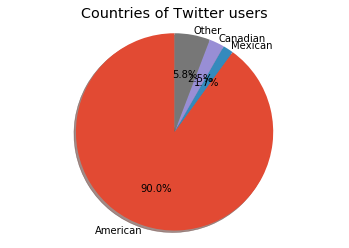

In [310]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'American', 'Mexican', 'Canadian', 'Other'
sizes = [amer_acc_nr, mex_acc_nr , can_acc_nr, other_acc_nr]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = cmap(np.linspace(0., 1., len(slices)))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
        shadow=True, startangle=90)

for part in slice_collection[0]:
    part.set_edgecolor('white')


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Countries of Twitter users")
plt.show()

In [290]:
neat_df["hashtag"]  = neat_df['text'].str.findall(r'#.*?(?=\s|$)')
neat_df

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user-screen_name,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates,hashtag
0,Sun Sep 11 02:05:23 +0000 2016,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,HillaryClinton,False,English,AlbertNewton22,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN,[]
1,Wed Aug 17 20:18:54 +0000 2016,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,None,False,English,JimmyBear2,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN,"[#NeverTrump, #BuhByeTRUMP, #TrumpIsUnfit]"
2,Fri Sep 02 23:06:23 +0000 2016,Attorney's first line of defense to those they...,None,False,English,GLCPOPS,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN,[#lyingHillary]
3,Thu Sep 01 03:01:51 +0000 2016,@kikesma @norma22flores @EPN @realDonaldTrump ...,kikesma,False,Spanish,upatrocinio,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN,[]
4,Sat Sep 10 05:22:45 +0000 2016,Classy.. Better than I expected. But on a se...,None,True,English,wfm01945,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tue Aug 16 01:40:52 +0000 2016,Esta bien guey @realDonaldTrump .,None,False,Spanish,DodgerSEL28,D-SEL™,"Los Angeles, CA",Husband - Father - #USArmy #Infantry Veteran -...,Wed Dec 26 05:07:04 +0000 2012,city,Santa Monica,US,United States,NaN,NaN,[]
996,Sat Sep 10 16:06:30 +0000 2016,@realDonaldTrump @tonyschwartz https://t.co/ak...,realDonaldTrump,False,Other,frederickwalser,Fred Walser,"Austin, Texas","Artist, Musician, Computer Consultant in Austi...",Sun Sep 27 05:58:46 +0000 2009,city,Austin,US,United States,NaN,NaN,[]
997,Thu Aug 18 23:03:18 +0000 2016,@realDonaldTrump please remind people and MSM ...,realDonaldTrump,False,English,fico_raymond,RayRay,"Palm Springs, CA","Been everywhere, seen everything Semper Fi Rol...",Fri Feb 05 14:35:33 +0000 2016,city,Palm Springs,US,United States,NaN,NaN,[]
998,Sun Aug 21 06:35:22 +0000 2016,@HillaryClinton how do you sleep at night?,HillaryClinton,False,English,alishariordan,Alisha,"Ft. Worth, TX",None,Thu Oct 04 03:04:26 +0000 2012,city,Watauga,US,United States,NaN,NaN,[]


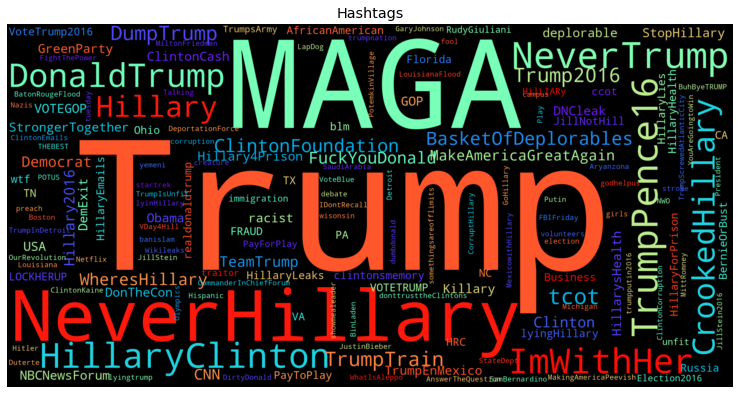

In [297]:
from wordcloud import WordCloud

hashtag_words = neat_df["text"].str.extractall(r'(\#\w+)')[0]


def make_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(hashtag_words,"black","rainbow","Hashtags")

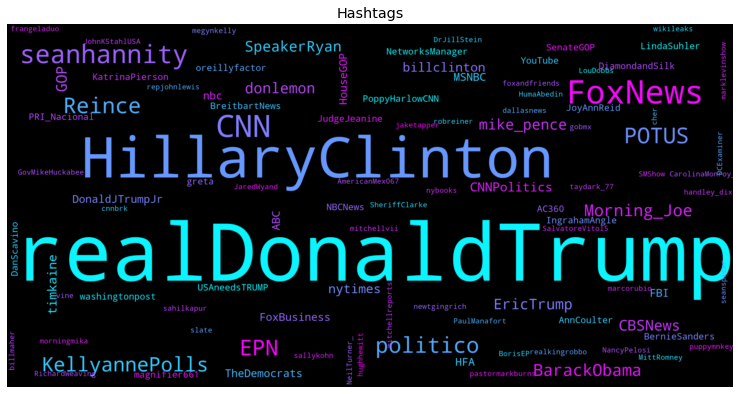

In [299]:

from wordcloud import WordCloud

accounts_mentioned = neat_df["text"].str.extractall(r'(\@\w+)')[0]


def make_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(accounts_mentioned,"black","cool","Hashtags")